<a href="https://colab.research.google.com/github/GayanthaL/Data-mining-mini-project/blob/main/Predict_customer_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the data set

import pandas as pd

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/Data_mining/WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

# Check the first few rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Ignore warnings for more covinience
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


First I want to start by setting the index.

In the previous cell, I realize that even though "TotalCharges" has numbers as value but type of the column is 'object'.

Also, since the most frequently used value is empty space, my second move will be to change this column type and also its most frequently used value.

In [ ]:
# Convert TotalCharges to numeric, as it might have missing or invalid entries
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **DATA VISUALIZATION**

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt


### Target Variable Distribution

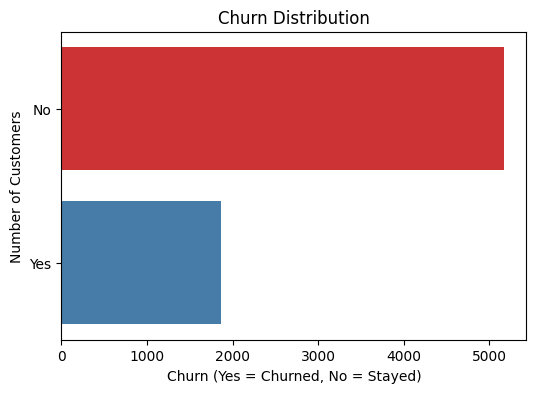

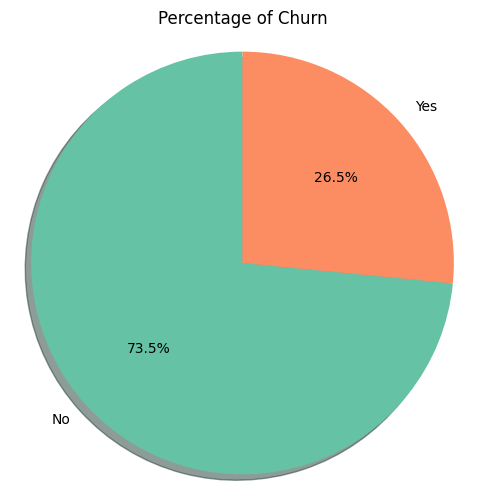

In [ ]:
# Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(data['Churn'], palette='Set1')
plt.title('Churn Distribution')
plt.xlabel('Churn (Yes = Churned, No = Stayed)')
plt.ylabel('Number of Customers')
plt.show()

# Churn Percentage Pie Chart
plt.figure(figsize=(6, 6))  # Making the figure square for the pie chart
plt.pie(data['Churn'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, shadow=True, colors=['#66c2a5', '#fc8d62'])
plt.title('Percentage of Churn')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

### Numerical Features Distributions

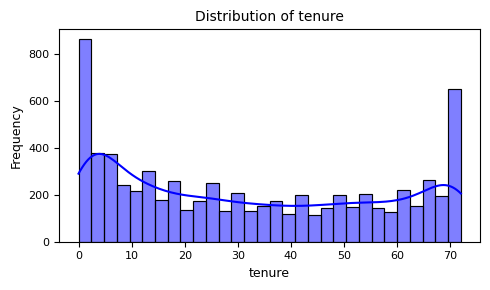

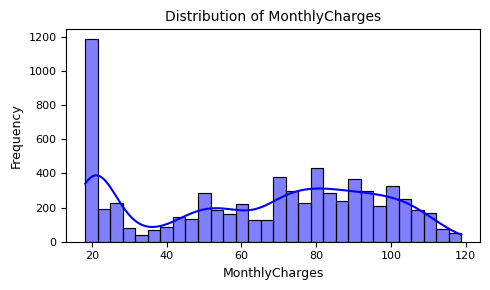

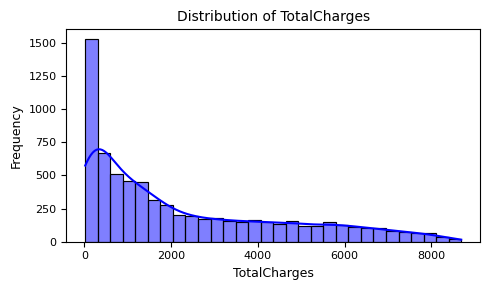

In [ ]:
# List of numerical features to visualize
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Loop through the numerical features and plot their distributions
for feature in numerical_features:
    plt.figure(figsize=(5, 3))  # Reduced figure size
    sns.histplot(data[feature], kde=True, color='blue', bins=30)  # KDE overlay on histogram
    plt.title(f'Distribution of {feature}', fontsize=10)
    plt.xlabel(feature, fontsize=9)
    plt.ylabel('Frequency', fontsize=9)
    plt.xticks(fontsize=8)  # Reduce x-axis tick font size
    plt.yticks(fontsize=8)  # Reduce y-axis tick font size
    plt.tight_layout()  # Adjust layout to fit everything properly
    plt.show()


### Relationship between Churn and few features

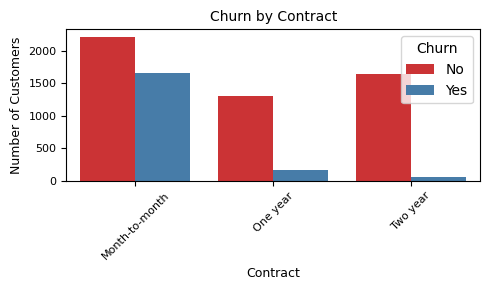

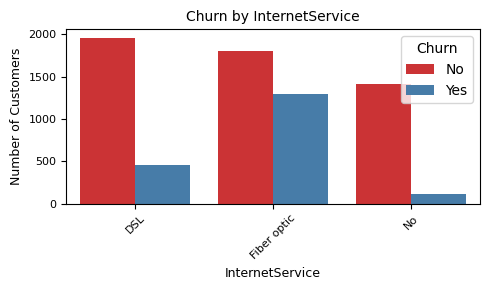

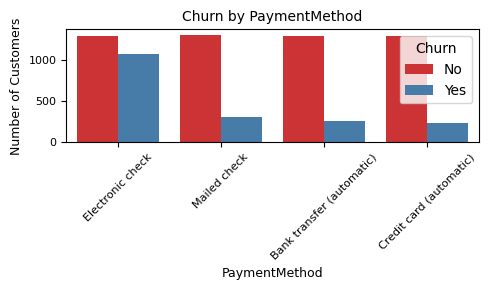

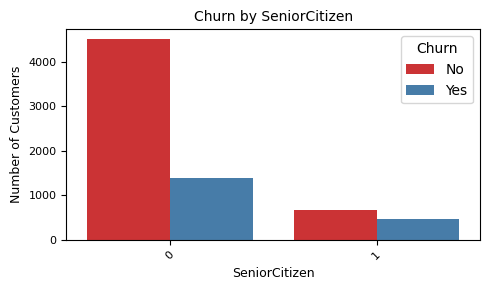

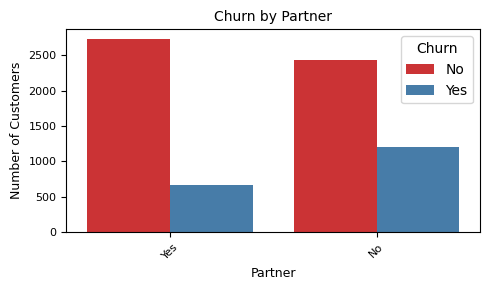

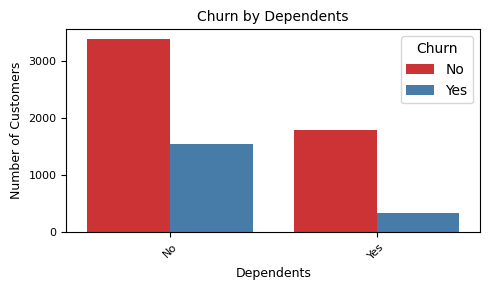

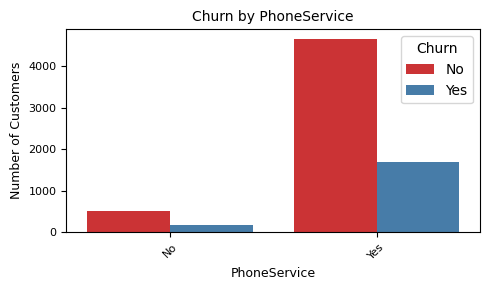

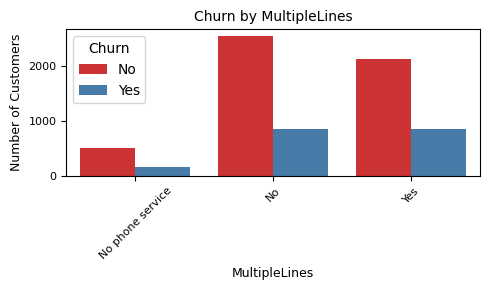

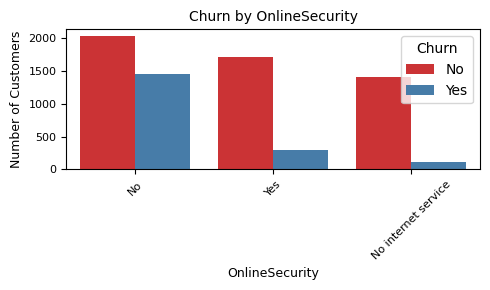

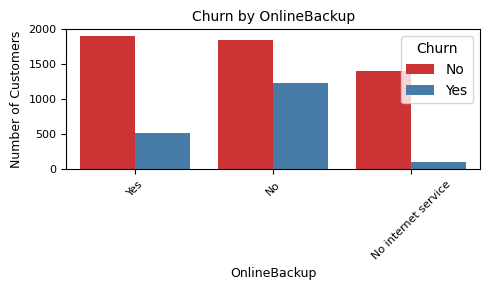

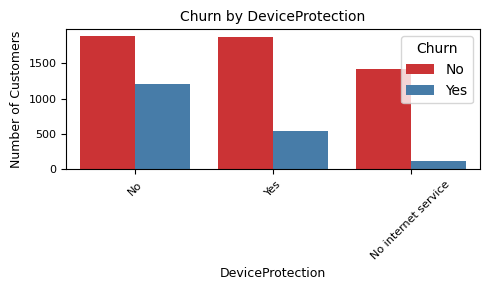

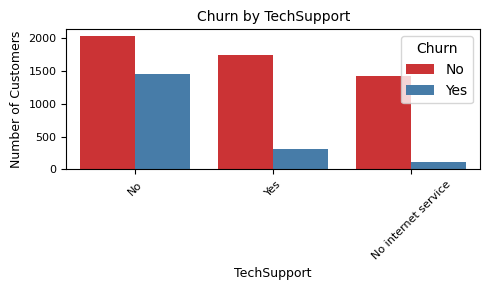

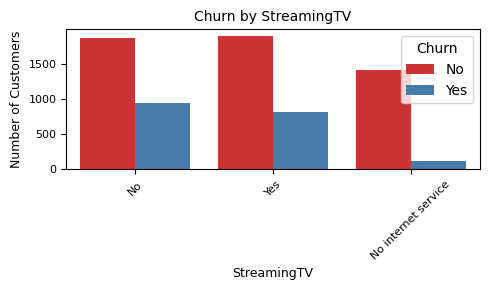

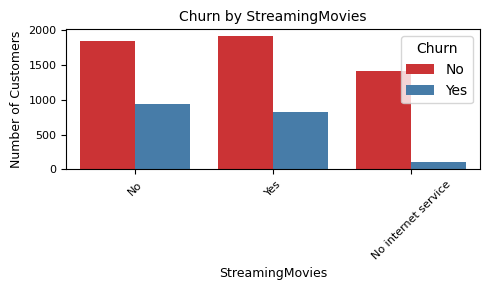

In [ ]:
# List of categorical features to visualize against 'Churn'
categorical_features = ['Contract', 'InternetService', 'PaymentMethod', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Loop through the categorical features and plot their relationship with Churn
for feature in categorical_features:
    plt.figure(figsize=(5,3))  # Reduced figure size
    sns.countplot(x=feature, hue='Churn', data=data, palette='Set1')
    plt.title(f'Churn by {feature}', fontsize=10)
    plt.xlabel(f'{feature}', fontsize=9)
    plt.ylabel('Number of Customers', fontsize=9)
    plt.xticks(rotation=45, fontsize=8)  # Rotate x labels and reduce font size
    plt.yticks(fontsize=8)  # Reduce y-axis tick font size
    plt.tight_layout()  # Adjust layout to fit everything properly
    plt.show()



### **Distribution Analysis**

### Pairplot for Numerical Features

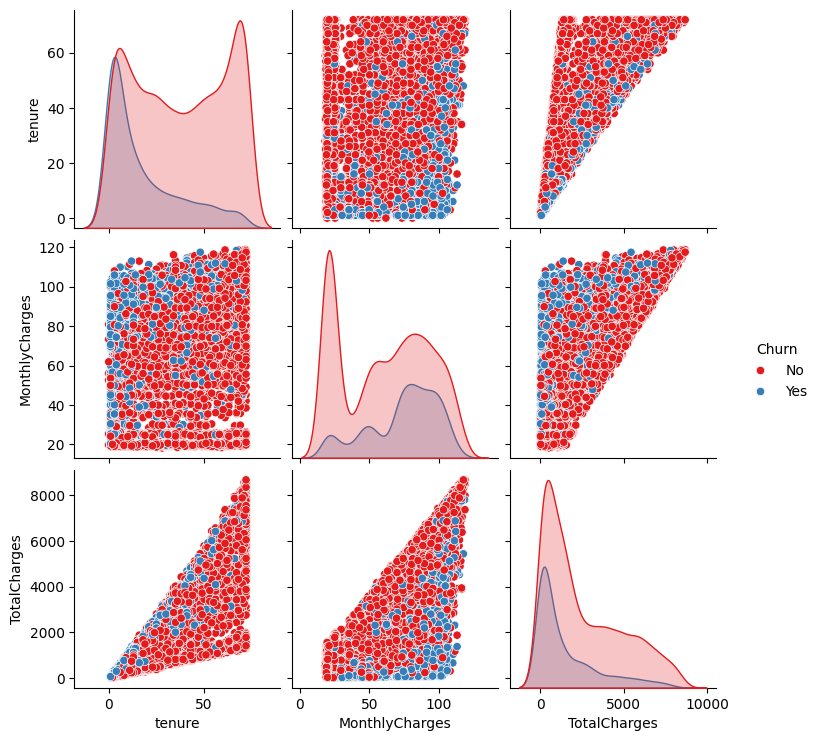

In [ ]:
# Convert TotalCharges to numeric, as it might have missing or invalid entries
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Pairplot for numerical features
sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', palette='Set1')
plt.show()


In [ ]:
# Summary statistics for numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
summary_statistics = data[numerical_features].describe()
print("Summary Statistics for Numerical Features:")
print(summary_statistics)


Summary Statistics for Numerical Features:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000


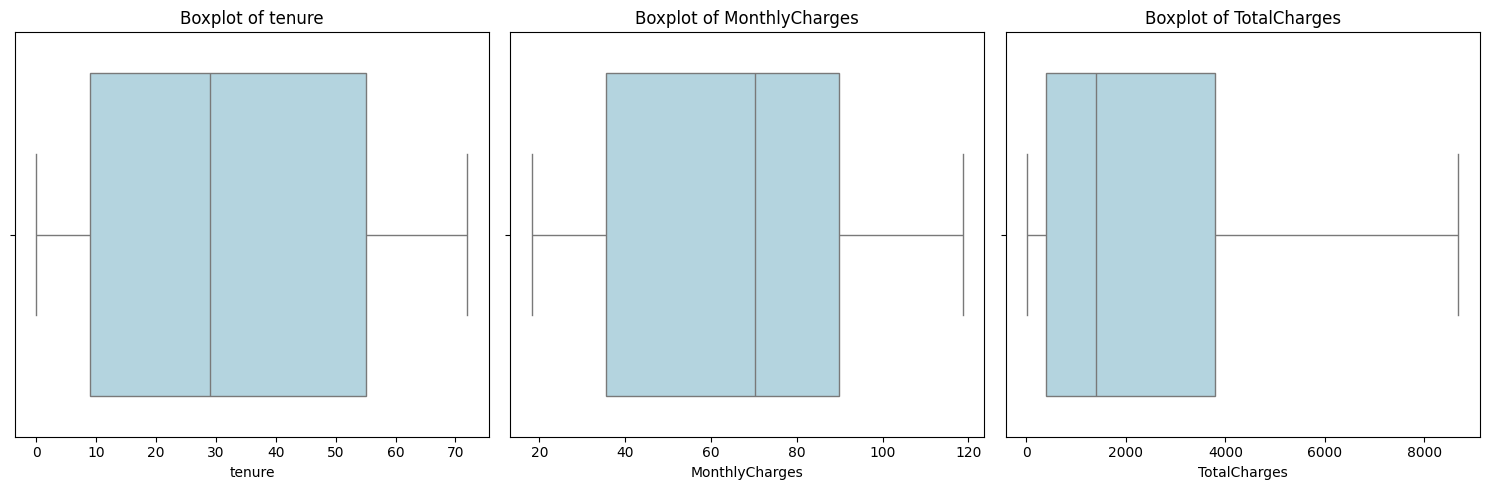

In [ ]:
# List of numerical features to visualize for outliers
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Loop through the numerical features and plot boxplots to identify outliers
plt.figure(figsize=(15, 5))  # Adjust size as needed
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)  # Create subplots
    sns.boxplot(x=data[feature], color='lightblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


### **Correlation Analysis**

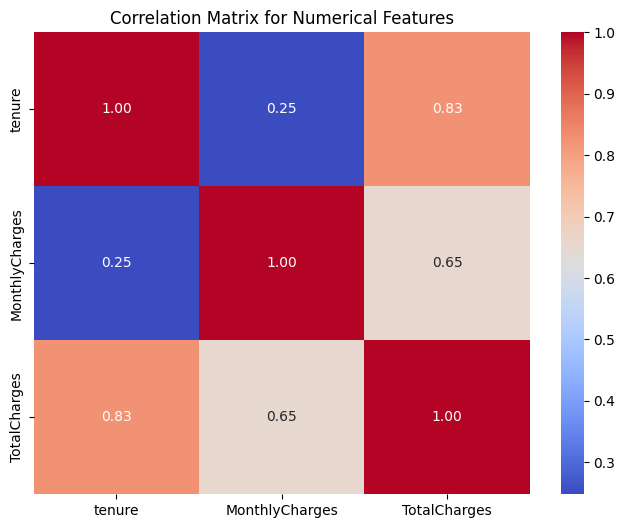

In [ ]:
# Convert TotalCharges to numeric (if not done already)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Correlation matrix for numerical features
corr_matrix = data[numerical_features].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()


### **Find the unique values**

In [ ]:
# Find unique values in each feature
unique_values = {column: data[column].unique() for column in data.columns}

# Display the unique values
for column, values in unique_values.items():
    print(f"{column}: {values}\n")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

SeniorCitizen: [0 1]

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank tra

###**DATA PREPROCESSING**

In [ ]:
# Shape of Dataset
print(f"The dataset has {data.shape[0]} Rows and {data.shape[1]} columns")

The dataset has 7043 Rows and 21 columns


In [ ]:
# Info of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Impute missing values in TotalCharges with the median
median_total_charges = data['TotalCharges'].median()
data['TotalCharges'] = data['TotalCharges'].fillna(median_total_charges)

# Verify that all missing values are handled
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
data.drop(['customerID'],axis=1,inplace=True)
columns = data.select_dtypes(include=['category','object']).columns
columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

### **Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Get the categorical columns
categorical_cols = data.select_dtypes(include='object').columns

# Create the one-hot encoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the categorical columns
encoded_data = onehot_encoder.fit_transform(data[categorical_cols])

# Create the encoded dataframe
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded data with the original dataframe
data = pd.concat([data, encoded_df], axis=1)

# Drop the original categorical columns
data = data.drop(categorical_cols, axis=1)

# Drop the 'Churn_No' column (if it exists)
if 'Churn_No' in data.columns:
    data.drop('Churn_No', axis=1, inplace=True)

# Reset the index
data.reset_index(drop=True, inplace=True)

# Preview the updated dataframe
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


### **Split the data**

In [ ]:
# Split
X = data.drop(['Churn_Yes'],axis=1)
y = data['Churn_Yes']
keys = X.columns
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### **Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scaling
scale = MinMaxScaler()
X = scale.fit_transform(X)
X = pd.DataFrame(X,columns=keys)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
!pip install imbalanced-learn

### **Data balancing**

In [ ]:
from imblearn.combine import SMOTEENN

# Apply SMOTEN to the training data
smoten = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoten.fit_resample(X, y)
# Print the shapes after applying SMOTEN
print('X_resampled shape is ', X_resampled.shape)
print('y_resampled shape is ', y_resampled.shape)

X_resampled shape is  (6147, 45)
y_resampled shape is  (6147,)


###**FEATURE SELECTION & COMPARISON**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import numpy as np

In [ ]:
# Use SelectKBest with ANOVA F-test
k = 15  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_resampled, y_resampled)

# Get the selected feature indices and names
selected_indices = selector.get_support(indices=True)
selected_features_anova = [keys[i] for i in selected_indices]

# Display the selected features
print("Selected Features using ANOVA F-test:")
print(selected_features_anova)


Selected Features using ANOVA F-test:
['tenure', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'TechSupport_No', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'Contract_Month-to-month', 'Contract_Two year', 'PaymentMethod_Electronic check']


In [ ]:
# Use SelectKBest with Mutual Information
selector_mi = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected_mi = selector_mi.fit_transform(X_resampled, y_resampled)

# Get the selected feature indices and names
selected_indices_mi = selector_mi.get_support(indices=True)
selected_features_mi = [keys[i] for i in selected_indices_mi]

# Display the selected features
print("Selected Features using Mutual Information:")
print(selected_features_mi)


Selected Features using Mutual Information:
['tenure', 'MonthlyCharges', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'TechSupport_No', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'Contract_Month-to-month', 'Contract_Two year', 'PaymentMethod_Electronic check']


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)

# Use RFE with Logistic Regression
rfe = RFE(estimator=model, n_features_to_select=k, step=1)
X_selected_rfe = rfe.fit_transform(X_resampled, y_resampled)

# Get the selected feature indices and names
selected_indices_rfe = rfe.get_support(indices=True)
selected_features_rfe = [keys[i] for i in selected_indices_rfe]

# Display the selected features
print("Selected Features using RFE (Logistic Regression):")
print(selected_features_rfe)


Selected Features using RFE (Logistic Regression):
['tenure', 'TotalCharges', 'PhoneService_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'TechSupport_No', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_Two year', 'PaperlessBilling_No']


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Fit the model to the data
gbc.fit(X_resampled, y_resampled)

# Get feature importances
feature_importances_gbc = gbc.feature_importances_

# Select top features based on importance
sorted_indices = feature_importances_gbc.argsort()[::-1]  # Sort indices by importance (descending)
selected_features_gbc = [keys[i] for i in sorted_indices[:k]]  # Top k features

# Display the selected features
print("Selected Features using Gradient Boosting Classifier:")
print(selected_features_gbc)


Selected Features using Gradient Boosting Classifier:
['Contract_Month-to-month', 'TechSupport_No', 'OnlineSecurity_No', 'InternetService_Fiber optic', 'tenure', 'MonthlyCharges', 'TotalCharges', 'PaymentMethod_Electronic check', 'Contract_Two year', 'Contract_One year', 'OnlineBackup_No', 'PaymentMethod_Mailed check', 'OnlineBackup_Yes', 'PaperlessBilling_No', 'StreamingMovies_Yes']


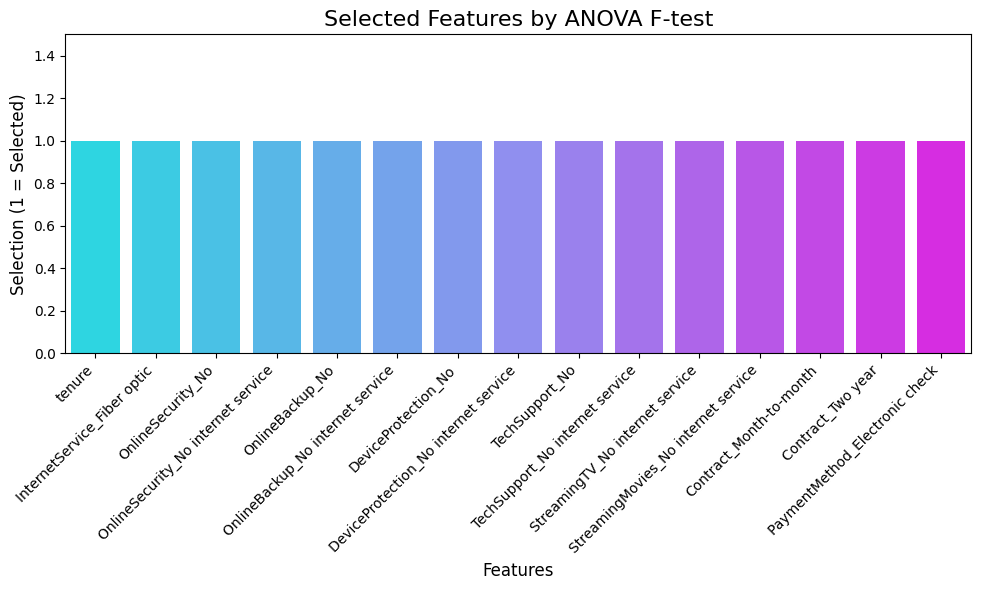

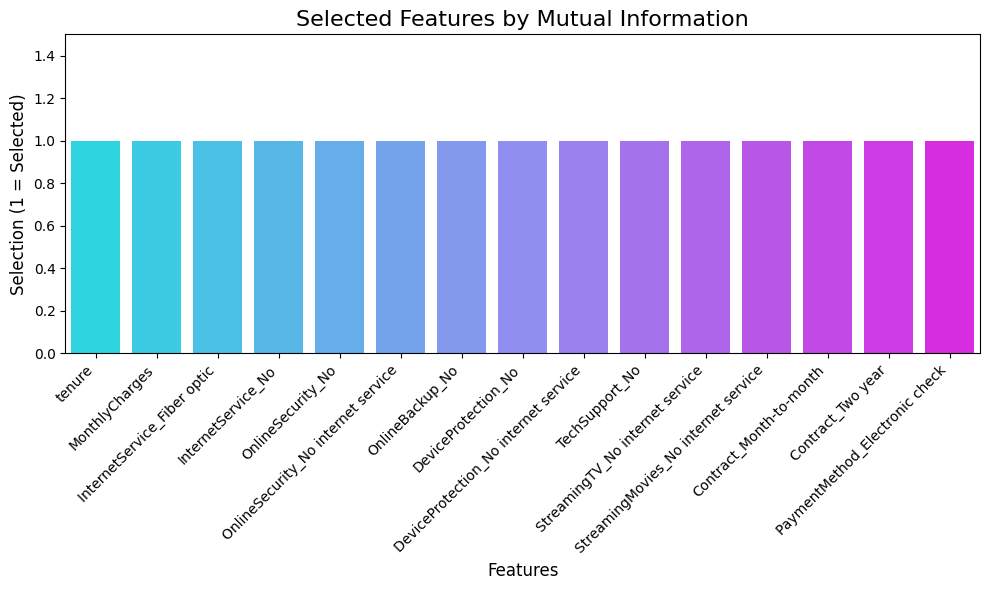

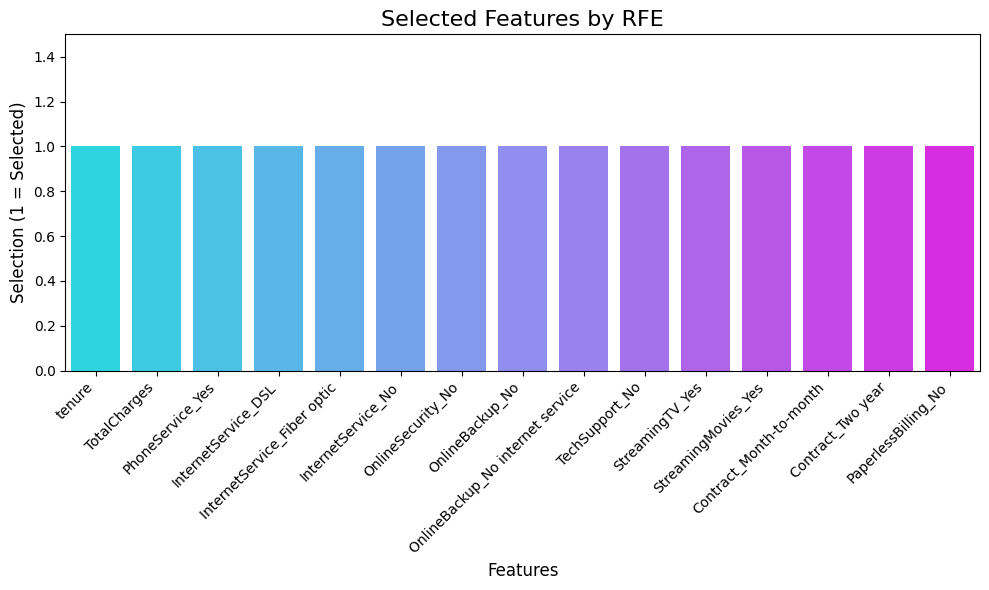

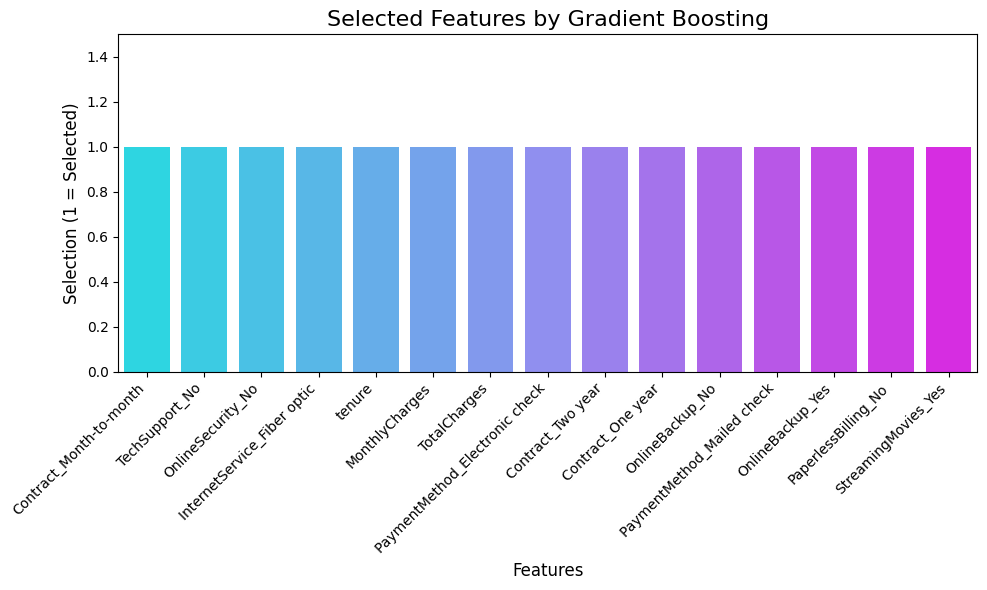

In [ ]:
# Define a function to plot the features selected by each method
def plot_selected_features(features, method_name):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=features, y=[1] * len(features), palette="cool")
    plt.title(f"Selected Features by {method_name}", fontsize=16)
    plt.xlabel("Features", fontsize=12)
    plt.ylabel("Selection (1 = Selected)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1.5)  # Set y-axis limit for better visualization
    plt.tight_layout()
    plt.show()

# Plot for ANOVA F-test
plot_selected_features(selected_features_anova, "ANOVA F-test")

# Plot for Mutual Information
plot_selected_features(selected_features_mi, "Mutual Information")

# Plot for RFE
plot_selected_features(selected_features_rfe, "RFE")

# Plot for Gradient Boosting
plot_selected_features(selected_features_gbc, "Gradient Boosting")

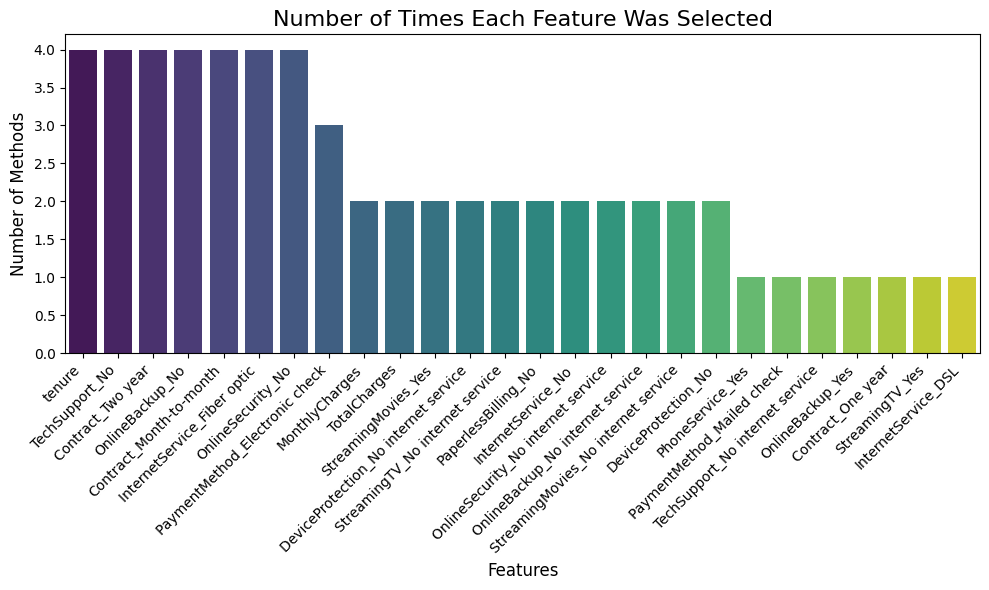

In [ ]:
# Combine all selected features into a DataFrame for visualization
all_features = list(set(selected_features_anova + selected_features_mi + selected_features_rfe + selected_features_gbc))
data = {
    'Feature': all_features,
    'ANOVA F-test': [1 if feature in selected_features_anova else 0 for feature in all_features],
    'Mutual Information': [1 if feature in selected_features_mi else 0 for feature in all_features],
    'RFE': [1 if feature in selected_features_rfe else 0 for feature in all_features],
    'Gradient Boosting': [1 if feature in selected_features_gbc else 0 for feature in all_features],
}

df_features = pd.DataFrame(data)

# Set the feature names as the index for better visualization
df_features.set_index('Feature', inplace=True)

# Count how many methods selected each feature
df_features['Total Selections'] = df_features.sum(axis=1)

# Sort features by total selections
df_features_sorted = df_features.sort_values('Total Selections', ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=df_features_sorted.index,
    y=df_features_sorted['Total Selections'],
    palette="viridis"
)
plt.title("Number of Times Each Feature Was Selected", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Number of Methods", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Find common features selected by more than one method
common_features = df_features[df_features['Total Selections'] > 1].index.tolist()

# Print the common features
print("Features selected by more than one method:")
for feature in common_features:
    print(feature)


Features selected by more than one method:
OnlineSecurity_No internet service
DeviceProtection_No
Contract_Two year
OnlineBackup_No
Contract_Month-to-month
StreamingMovies_No internet service
OnlineBackup_No internet service
PaymentMethod_Electronic check
MonthlyCharges
OnlineSecurity_No
PaperlessBilling_No
StreamingTV_No internet service
DeviceProtection_No internet service
InternetService_Fiber optic
StreamingMovies_Yes
TotalCharges
TechSupport_No
tenure
InternetService_No


###Split into test and train

In [ ]:
from sklearn.model_selection import train_test_split

# List of common features selected by more than one method
common_features = [
    'Contract_Month-to-month', 'InternetService_Fiber optic', 'TotalCharges',
    'OnlineSecurity_No', 'DeviceProtection_No', 'TechSupport_No', 'Contract_Two year',
    'tenure', 'OnlineBackup_No', 'PaymentMethod_Electronic check', 'MonthlyCharges',
    'OnlineSecurity_No internet service', 'DeviceProtection_No internet service',
    'OnlineBackup_No internet service', 'PaperlessBilling_No', 'StreamingTV_No internet service',
    'StreamingMovies_Yes', 'InternetService_No'
]

# Assuming X_data is the original dataset and y is the target
X_common = X[common_features]  # Select only the common features
# Convert the DataFrame to a NumPy array
X_common = X_common.to_numpy()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_common, y, test_size=0.2, random_state=42)

###**MODEL COMPARISON AND FINALYSE BEST MODEL**

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Define models and their parameter grids
model_params = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, max_iter=1000),
        "params": {
            "C": [0.1, 1, 10],
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "Neural Network": {
        "model": MLPClassifier(random_state=42, max_iter=500),
        "params": {
            "hidden_layer_sizes": [(50,), (100,), (100, 50)],
            "activation": ["relu", "tanh"],
            "alpha": [0.0001, 0.001],
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 150],
            "max_depth": [3, 5, 7]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        "params": {
            "n_estimators": [50, 100, 150],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7]
        }
    }
}


In [ ]:
from sklearn.model_selection import GridSearchCV

best_models = {}
results = {}

# Loop over the models and perform GridSearchCV
for model_name, mp in model_params.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(estimator=mp["model"], param_grid=mp["params"], cv=5, scoring="f1", verbose=2)
    grid_search.fit(X_train, y_train)

    # Store best model and results
    best_models[model_name] = grid_search.best_estimator_
    results[model_name] = grid_search.best_score_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Cross-validated F1-score: {grid_search.best_score_:.4f}\n")


Tuning Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..........

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
    }
    if y_prob is not None:
        metrics["AUC"] = roc_auc_score(y_test, y_prob)

    return metrics

# Evaluate all best models
test_results = {}
for model_name, model in best_models.items():
    test_results[model_name] = evaluate_model(model, X_test, y_test)

# Display results
for model, metrics in test_results.items():
    print(f"Test Metrics for {model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()


Test Metrics for Logistic Regression:
  Accuracy: 0.8197
  Precision: 0.6877
  Recall: 0.5845
  F1-Score: 0.6319
  AUC: 0.8592

Test Metrics for Neural Network:
  Accuracy: 0.8027
  Precision: 0.6508
  Recall: 0.5496
  F1-Score: 0.5959
  AUC: 0.8503

Test Metrics for Random Forest:
  Accuracy: 0.8077
  Precision: 0.6809
  Recall: 0.5147
  F1-Score: 0.5863
  AUC: 0.8599

Test Metrics for XGBoost:
  Accuracy: 0.8119
  Precision: 0.6788
  Recall: 0.5496
  F1-Score: 0.6074
  AUC: 0.8586



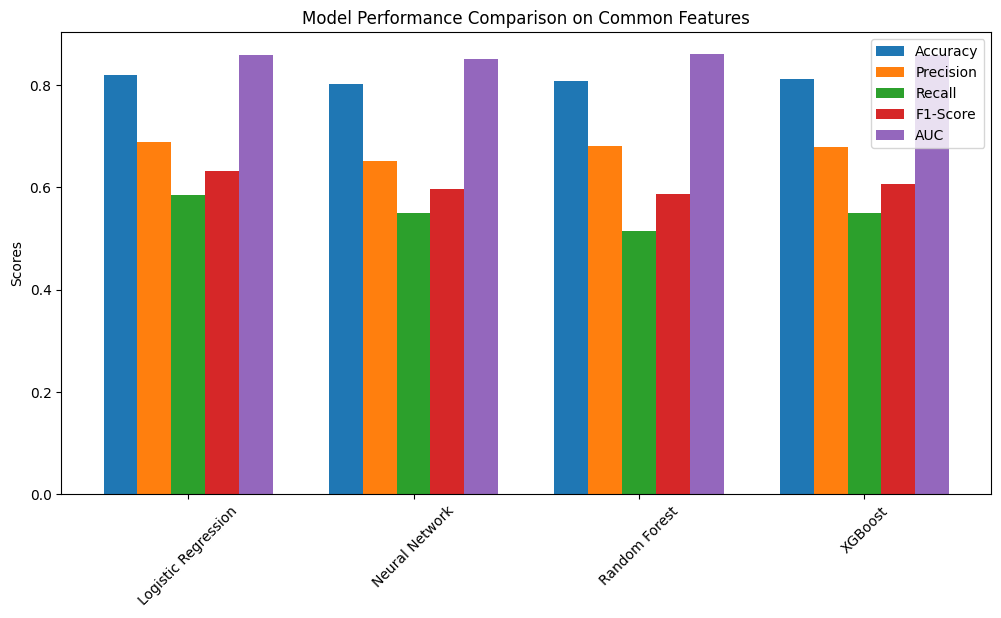

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]
performance = {metric: [test_results[model][metric] for model in test_results] for metric in metric_names}

# Plot metrics
plt.figure(figsize=(12, 6))
x = np.arange(len(best_models))
width = 0.15

for i, metric in enumerate(metric_names):
    plt.bar(x + i * width, performance[metric], width, label=metric)

plt.xticks(x + width * 2, list(best_models.keys()), rotation=45)
plt.ylabel("Scores")
plt.title("Model Performance Comparison on Common Features")
plt.legend()
plt.show()


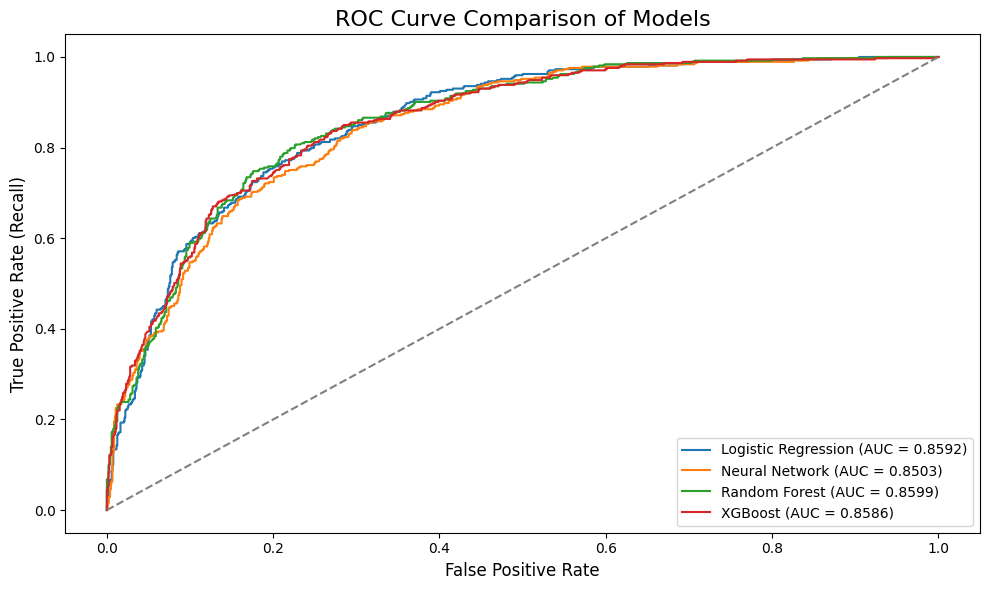

In [ ]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve for all models
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 6))

    for model_name, model in models.items():
        # Get probabilities for ROC curve
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_test)

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

    # Plot diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

    # Set plot labels and title
    plt.title('ROC Curve Comparison of Models', fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate (Recall)', fontsize=12)
    plt.legend(loc='lower right')
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage for plotting ROC curve for all models
models = best_models  # Assuming 'best_models' contains your trained models
plot_roc_curve(models, X_test, y_test)


###**without feature selection**

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define models and their parameter grids
model_params = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, max_iter=1000),
        "params": {
            "C": [0.1, 1, 10],
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "Neural Network": {
        "model": MLPClassifier(random_state=42, max_iter=500),
        "params": {
            "hidden_layer_sizes": [(50,), (100,)],
            "activation": ["relu", "tanh"],
            "alpha": [0.0001, 0.001],
            "learning_rate": ["constant", "adaptive"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 150],
            "max_depth": [3, 5, 7]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        "params": {
            "n_estimators": [50, 100, 150],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7]
        }
    }
}


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X_resampled and y_resampled are your features and target
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42  # Adjust test_size and random_state as needed
)

# Now you can use X_train and y_train in your GridSearchCV
best_models = {}
results = {}

for model_name, mp in model_params.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(estimator=mp["model"], param_grid=mp["params"], cv=5, scoring="f1", verbose=2)
    grid_search.fit(X_train, y_train)

    # Store best model and results
    best_models[model_name] = grid_search.best_estimator_
    results[model_name] = grid_search.best_score_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Cross-validated F1-score: {grid_search.best_score_:.4f}\n")

Tuning Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.1s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.2s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.1s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.1s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.2s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.2s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.1s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.3s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.1s
[CV] END ..............................C=1, solver=liblinear; total time=   0.1s
[CV] END ..........

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
    }
    if y_prob is not None:
        metrics["AUC"] = roc_auc_score(y_test, y_prob)
    return metrics

# Evaluate all best models
test_results = {}
for model_name, model in best_models.items():
    test_results[model_name] = evaluate_model(model, X_test, y_test)

# Display results
for model, metrics in test_results.items():
    print(f"Test Metrics for {model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()


Test Metrics for Logistic Regression:
  Accuracy: 0.9106
  Precision: 0.9096
  Recall: 0.9235
  F1-Score: 0.9165
  AUC: 0.9752

Test Metrics for Neural Network:
  Accuracy: 0.9748
  Precision: 0.9656
  Recall: 0.9878
  F1-Score: 0.9766
  AUC: 0.9948

Test Metrics for Random Forest:
  Accuracy: 0.9325
  Precision: 0.9255
  Recall: 0.9495
  F1-Score: 0.9374
  AUC: 0.9855

Test Metrics for XGBoost:
  Accuracy: 0.9699
  Precision: 0.9681
  Recall: 0.9755
  F1-Score: 0.9718
  AUC: 0.9938



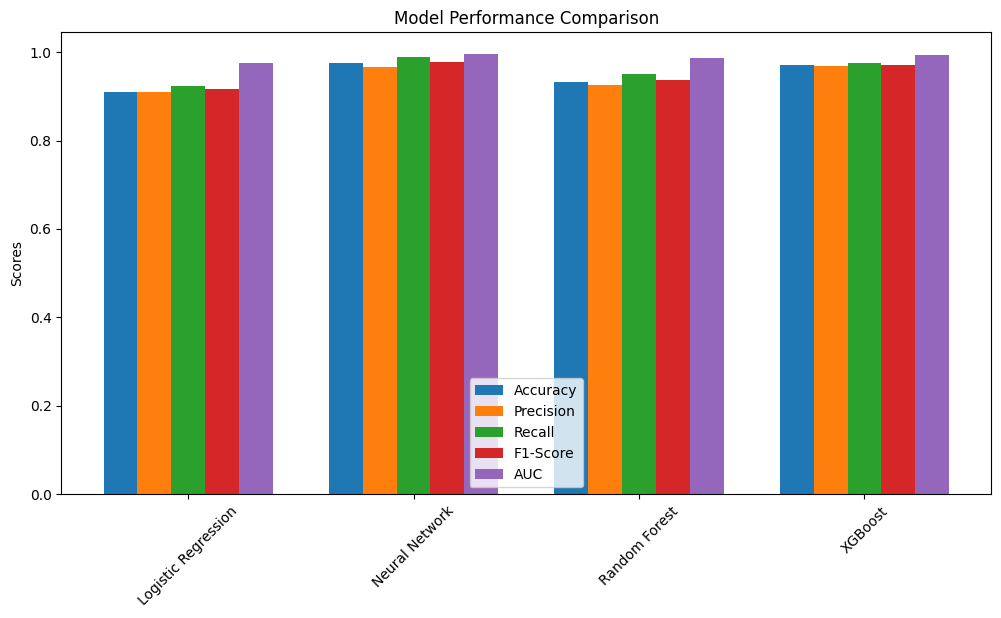

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]
performance = {metric: [test_results[model][metric] for model in test_results] for metric in metric_names}

# Plot metrics
plt.figure(figsize=(12, 6))
x = np.arange(len(best_models))
width = 0.15

for i, metric in enumerate(metric_names):
    plt.bar(x + i * width, performance[metric], width, label=metric)

plt.xticks(x + width * 2, list(best_models.keys()), rotation=45)
plt.ylabel("Scores")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()
